<a href="https://colab.research.google.com/github/kleczekr/tolkenizer/blob/master/violence7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline 

import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches # needed for waffle Charts
# import seaborn as sns
import numpy as np

In [2]:
mpl.style.use(['ggplot'])

In [3]:
# This cell is meant to accommodate the Google Colab way of dealing with reading 
# files from Google Drive; feel free to ignore it if you are running the notebook
# on your local machine
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
df = pd.read_excel('/content/drive/My Drive/ethnic_violence/globalterrorismdb_0919dist.xlsx')

In [5]:
condition = df.country_txt.isin(['India', 'Pakistan', 'Bangladesh', 'Sri Lanka'])
df_sa = df[condition]

In [6]:
sa_ctr = df_sa.groupby(['iyear', 'country_txt']).nkill.sum()

In [7]:
df_sa_ctr = sa_ctr.unstack(level=1).reset_index()

In [8]:
df_sa_ctr = df_sa_ctr.fillna(0)

In [9]:
sa_ctr_sum = df_sa_ctr.iloc[:, 1:].sum(axis = 0, skipna = True) 
sa_ctr_sum

country_txt
Bangladesh     1257.0
India         19753.0
Pakistan      24520.0
Sri Lanka     15533.0
dtype: float64

In [10]:
total_values = sum(sa_ctr_sum)
category_proportions = [(float(value) / total_values) for value in sa_ctr_sum]

In [11]:
print('total: {}\nproportions: {}'.format(total_values, category_proportions))

total: 61063.0
proportions: [0.020585297152121578, 0.323485580466076, 0.4015524949642173, 0.2543766274175851]


In [22]:
def create_waffle_chart(categories, values, height, width, colormap, value_sign=''):

    # compute the proportion of each category with respect to the total
    total_values = sum(values)
    category_proportions = [(float(value) / total_values) for value in values]

    # compute the total number of tiles
    total_num_tiles = width * height # total number of tiles
    print ('Total number of tiles is', total_num_tiles)
    
    # compute the number of tiles for each catagory
    tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

    # print out number of tiles per category
    for i, tiles in enumerate(tiles_per_category):
        print (categories[i] + ': ' + str(tiles))
    
    # initialize the waffle chart as an empty matrix
    waffle_chart = np.zeros((height, width))

    # define indices to loop through waffle chart
    category_index = 0
    tile_index = 0

    # populate the waffle chart
    for col in range(width):
        for row in range(height):
            tile_index += 1

            # if the number of tiles populated for the current category 
            # is equal to its corresponding allocated tiles...
            if tile_index > sum(tiles_per_category[0:category_index]):
                # ...proceed to the next category
                category_index += 1       
            
            # set the class value to an integer, which increases with class
            waffle_chart[row, col] = category_index
    
    # instantiate a new figure object
    fig = plt.figure()

    # use matshow to display the waffle chart
    colormap = plt.cm.coolwarm
    plt.matshow(waffle_chart, cmap=colormap)
    plt.colorbar()

    # get the axis
    ax = plt.gca()

    # set minor ticks
    ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
    ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
    # add dridlines based on minor ticks
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

    plt.xticks([])
    plt.yticks([])

    # compute cumulative sum of individual categories to match color schemes between chart and legend
    values_cumsum = np.cumsum(values)
    total_values = values_cumsum[len(values_cumsum) - 1]

    # create legend
    legend_handles = []
    for i, category in enumerate(categories):
        if value_sign == '%':
            label_str = category + ' (' + str(values[i]) + value_sign + ')'
        else:
            label_str = category + ' (' + value_sign + str(values[i]) + ')'
            
        color_val = colormap(float(values_cumsum[i])/total_values)
        legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

    # add legend to chart
    plt.legend(
        handles=legend_handles,
        loc='lower center', 
        ncol=len(categories),
        bbox_to_anchor=(0., -0.2, 0.95, .1)
    )

In [23]:
width = 40 # width of chart
height = 10 # height of chart

categories = sa_ctr_sum.index.values # categories
values = sa_ctr_sum

colormap = plt.cm.coolwarm # color map class

Total number of tiles is 400
Bangladesh: 8
India: 129
Pakistan: 161
Sri Lanka: 102


<Figure size 432x288 with 0 Axes>

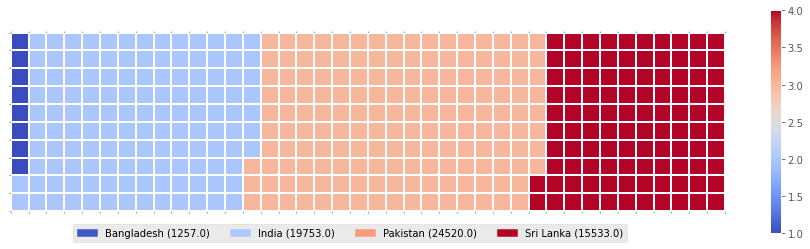

In [24]:
create_waffle_chart(categories, values, height, width, colormap)

In [27]:
!pip install pywaffle
from pywaffle import Waffle

     |████████████████████████████████| 532kB 4.4MB/s 


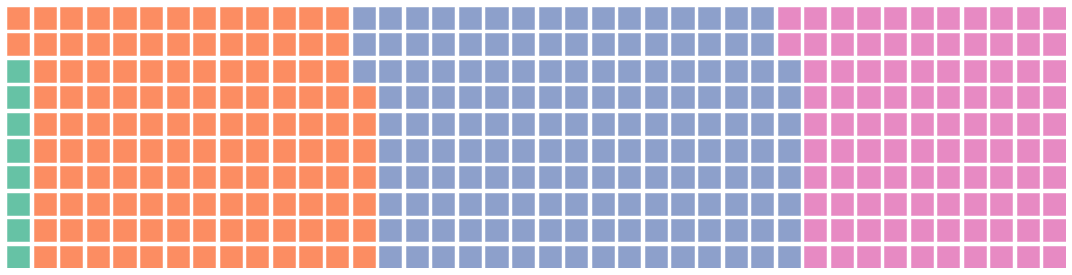

In [30]:
fig = plt.figure(
    FigureClass=Waffle, 
    rows=10, 
    columns=40, 
    values=sa_ctr_sum,
    figsize=(15,8)
)
plt.show()

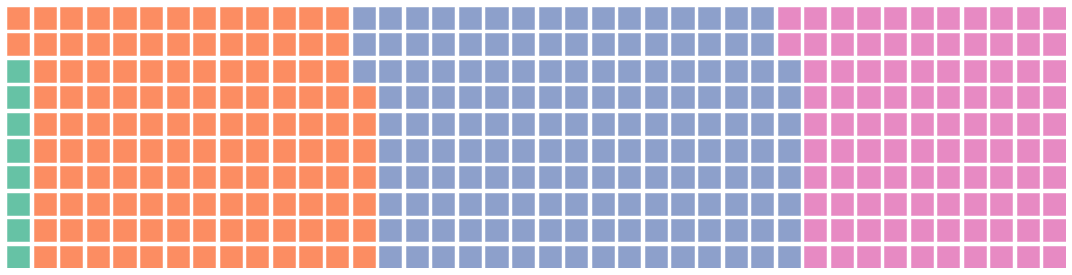

In [31]:
fig = plt.figure(
    FigureClass=Waffle, 
    rows=10,
    columns = 40,
    values=sa_ctr_sum, 
    legend={'loc': 'upper left', 'bbox_to_anchor': (1.1, 1)},
    figsize=(15,6)
)
plt.show()

In [32]:
# no legend? let's convert the series to a dictionary:
sa_dict = sa_ctr_sum.to_dict()

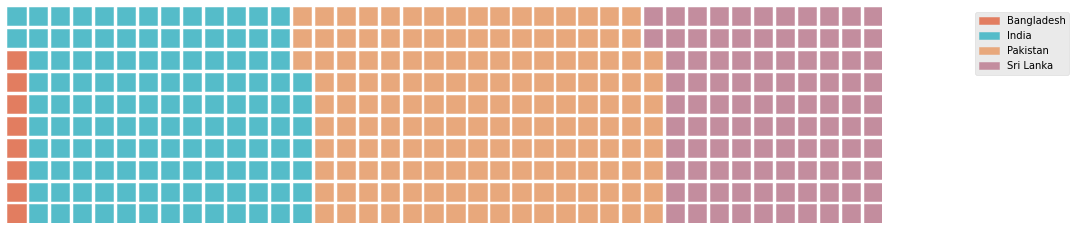

In [42]:
fig = plt.figure(
    FigureClass=Waffle, 
    rows=10,
    columns = 40,
    values=sa_dict,
    colors=["#E27D60", "#55BCC9", "#E8A87C", "#C38D9E"],
    legend={'loc': 'upper left', 'bbox_to_anchor': (1.1, 1)},
    figsize=(15,6)
)
plt.show()

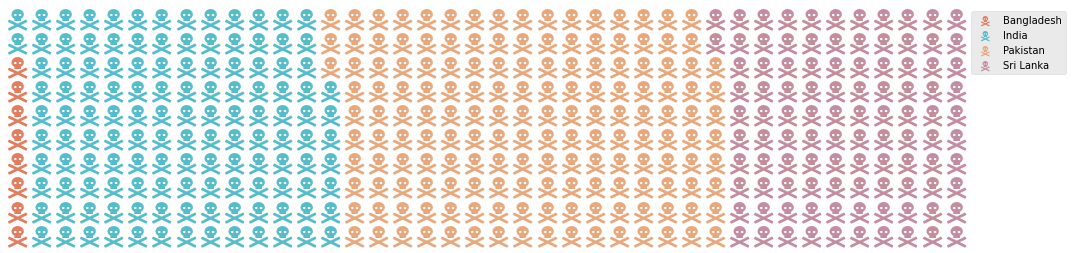

In [43]:
fig = plt.figure(
    FigureClass=Waffle, 
    rows=10,
    columns=40, 
    values=sa_dict,
    colors=["#E27D60", "#55BCC9", "#E8A87C", "#C38D9E"],
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    icons='skull-crossbones', 
    font_size=22, 
    icon_legend=True,
    figsize=(15,6)
)
plt.show()